<a href="https://colab.research.google.com/github/ClausGB/Calculo_Aplicado/blob/main/VolumenTanque.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SISTEMA DE GESTIÓN DE COMBUSTIBLE - ESTACIÓN DE SERVICIO

Tanque de Gasolina 95:
  Tipo: cilindrico
  Dimensiones: 10m x 1.5m
  Nivel actual: 2.1m
  Volumen: 70.69 m³ (70686 litros)

Tanque de Diésel:
  Tipo: eliptico
  Dimensiones: 8m x 1.2m
  Nivel actual: 1.8m
  Volumen: 35.87 m³ (35865 litros)

Tanque de Gasolina 98:
  Tipo: esferico
  Dimensiones: 6m x 1.8m
  Nivel actual: 2.5m
  Volumen: 24.43 m³ (24429 litros)

INVENTARIO TOTAL: 130.98 m³ (130980 litros)

TABLA DE CAPACIDAD - Tanque cilindrico
Longitud: 10.00m, Radio: 1.50m
Nivel (m)    % Llenado    Volumen (m³)    Volumen (L)    
------------------------------------------------------------
0.00         0.0          0.000000        0              
0.30         4.0          2.827433        2827           
0.60         16.0         11.309734       11310          
0.90         36.0         25.446900       25447          
1.20         64.0         45.238934       45239          
1.50         100.0        70.685835       70686       

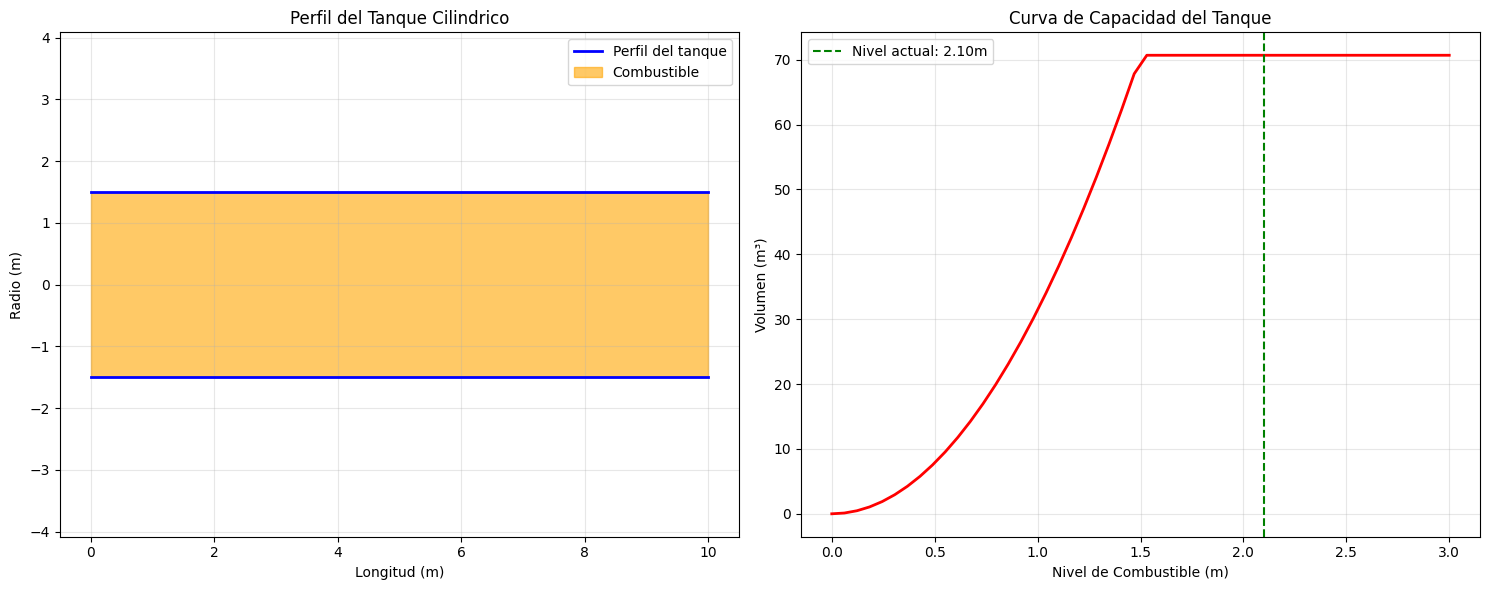


CONTROL DE CALIDAD - VERIFICACIÓN DE ESPECIFICACIONES
Capacidad nominal: 60,000 litros
Capacidad calculada: 122,145 litros
Diferencia: 62,145 litros (103.58%)
✗ TANQUE RECHAZADO - Fuera de tolerancia

COMPARACIÓN DE MÉTODOS NUMÉRICOS
RIEMANN     : 70.68583471 m³
TRAPECIO    : 70.68583471 m³
SIMPSON     : 70.68583471 m³

¡Simulación completada! Los métodos están listos para uso industrial.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

class CalculadorVolumenTanque:
    """
    Sistema para calcular volúmenes de combustible en tanques industriales
    usando diferentes métodos de integración numérica.
    """

    def __init__(self):
        self.historial = []

    def perfil_tanque_horizontal(self, x, L, R):
        """
        Perfil de un tanque cilíndrico horizontal
        x: posición a lo largo del tanque
        L: longitud del tanque
        R: radio del tanque
        """
        return R  # Radio constante para cilindro

    def perfil_tanque_esferico(self, x, L, R):
        """
        Perfil de un tanque esférico
        """
        # Para tanque esférico, el radio varía con la posición
        centro = L / 2
        distancia_al_centro = abs(x - centro)
        if distancia_al_centro > R:
            return 0
        return np.sqrt(R**2 - distancia_al_centro**2)

    def perfil_tanque_eliptico(self, x, L, R):
        """
        Perfil de tanque con fondos elípticos
        """
        a = L / 2  # Semieje mayor
        b = R      # Semieje menor

        if x < R:  # Fondo elíptico izquierdo
            return b * np.sqrt(1 - ((x - R) / a)**2)
        elif x > L - R:  # Fondo elíptico derecho
            return b * np.sqrt(1 - ((x - (L - R)) / a)**2)
        else:  # Cuerpo cilíndrico
            return R

    def metodo_riemann(self, func, a, b, n, tipo='izquierda'):
        """
        Método de Riemann para integración numérica
        """
        dx = (b - a) / n
        x_points = np.linspace(a, b, n + 1)
        suma = 0

        if tipo == 'izquierda':
            for i in range(n):
                x = x_points[i]
                suma += func(x) * dx
        elif tipo == 'derecha':
            for i in range(1, n + 1):
                x = x_points[i]
                suma += func(x) * dx
        elif tipo == 'medio':
            for i in range(n):
                x = (x_points[i] + x_points[i + 1]) / 2
                suma += func(x) * dx

        return suma

    def metodo_trapecio(self, func, a, b, n):
        """
        Método del trapecio para integración numérica
        """
        dx = (b - a) / n
        x_points = np.linspace(a, b, n + 1)

        suma = 0.5 * (func(a) + func(b))
        for i in range(1, n):
            suma += func(x_points[i])

        return suma * dx

    def metodo_simpson(self, func, a, b, n):
        """
        Método de Simpson (parábola) para integración numérica
        n debe ser par
        """
        if n % 2 != 0:
            n += 1  # Asegurar que n sea par

        dx = (b - a) / n
        x_points = np.linspace(a, b, n + 1)

        suma = func(a) + func(b)

        # Términos impares
        for i in range(1, n, 2):
            suma += 4 * func(x_points[i])

        # Términos pares
        for i in range(2, n, 2):
            suma += 2 * func(x_points[i])

        return suma * dx / 3

    def calcular_volumen_tanque(self, tipo_tanque, longitud, radio, nivel_combustible,
                               metodo='simpson', n_secciones=1000):
        """
        Calcula el volumen de combustible en un tanque dado el nivel
        """
        # Función que da el radio del tanque a una posición x, considerando el nivel de combustible
        def radio_efectivo(x):
            perfil = 0
            if tipo_tanque == 'cilindrico':
                perfil = self.perfil_tanque_horizontal(x, longitud, radio)
            elif tipo_tanque == 'esferico':
                perfil = self.perfil_tanque_esferico(x, longitud, radio)
            elif tipo_tanque == 'eliptico':
                perfil = self.perfil_tanque_eliptico(x, longitud, radio)

            # Si el nivel de combustible está por debajo del radio máximo en esa posición
            if nivel_combustible < perfil:
                return nivel_combustible
            else:
                return perfil

        def area_seccion(x):
            r = radio_efectivo(x)
            return np.pi * r**2

        # Calcular volumen según el método seleccionado
        if metodo == 'riemann':
            volumen = self.metodo_riemann(area_seccion, 0, longitud, n_secciones, 'medio')
        elif metodo == 'trapecio':
            volumen = self.metodo_trapecio(area_seccion, 0, longitud, n_secciones)
        elif metodo == 'simpson':
            volumen = self.metodo_simpson(area_seccion, 0, longitud, n_secciones)
        else:
            raise ValueError("Método no válido")

        return volumen

    def analizar_precision(self, tipo_tanque, longitud, radio, nivel_combustible):
        """
        Compara la precisión de los tres métodos
        """
        resultados = {}

        for metodo in ['riemann', 'trapecio', 'simpson']:
            volumen = self.calcular_volumen_tanque(
                tipo_tanque, longitud, radio, nivel_combustible, metodo
            )
            resultados[metodo] = volumen

        # Guardar en historial
        self.historial.append({
            'fecha': datetime.now(),
            'tipo_tanque': tipo_tanque,
            'longitud': longitud,
            'radio': radio,
            'nivel': nivel_combustible,
            'resultados': resultados
        })

        return resultados

    def generar_tabla_capacidad(self, tipo_tanque, longitud, radio,
                               niveles=np.linspace(0, 1, 11)):
        """
        Genera tabla de capacidad para diferentes niveles de llenado
        """
        print(f"\n{'='*60}")
        print(f"TABLA DE CAPACIDAD - Tanque {tipo_tanque}")
        print(f"Longitud: {longitud:.2f}m, Radio: {radio:.2f}m")
        print(f"{'='*60}")
        print(f"{'Nivel (m)':<12} {'% Llenado':<12} {'Volumen (m³)':<15} {'Volumen (L)':<15}")
        print(f"{'-'*60}")

        volumen_maximo = self.calcular_volumen_tanque(
            tipo_tanque, longitud, radio, radio * 2, 'simpson'
        )

        for nivel_rel in niveles:
            nivel_absoluto = nivel_rel * radio * 2  # Convertir a metros absolutos
            volumen = self.calcular_volumen_tanque(
                tipo_tanque, longitud, radio, nivel_absoluto, 'simpson'
            )
            porcentaje = (volumen / volumen_maximo) * 100

            print(f"{nivel_absoluto:<12.2f} {porcentaje:<12.1f} {volumen:<15.6f} {volumen*1000:<15.0f}")

    def visualizar_tanque(self, tipo_tanque, longitud, radio, nivel_combustible):
        """
        Visualiza el tanque con el nivel de combustible
        """
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        # Perfil del tanque
        x_points = np.linspace(0, longitud, 100)
        y_superior = []
        y_inferior = []
        y_combustible = []

        for x in x_points:
            if tipo_tanque == 'cilindrico':
                perfil = self.perfil_tanque_horizontal(x, longitud, radio)
            elif tipo_tanque == 'esferico':
                perfil = self.perfil_tanque_esferico(x, longitud, radio)
            elif tipo_tanque == 'eliptico':
                perfil = self.perfil_tanque_eliptico(x, longitud, radio)

            y_superior.append(perfil)
            y_inferior.append(-perfil)

            # Nivel de combustible
            if nivel_combustible < perfil:
                y_combustible.append(nivel_combustible)
            else:
                y_combustible.append(perfil)

        # Gráfico 1: Perfil completo
        ax1.plot(x_points, y_superior, 'b-', linewidth=2, label='Perfil del tanque')
        ax1.plot(x_points, y_inferior, 'b-', linewidth=2)
        ax1.fill_between(x_points, y_combustible, -np.array(y_combustible),
                        alpha=0.6, color='orange', label='Combustible')
        ax1.set_xlabel('Longitud (m)')
        ax1.set_ylabel('Radio (m)')
        ax1.set_title(f'Perfil del Tanque {tipo_tanque.capitalize()}')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        ax1.axis('equal')

        # Gráfico 2: Curva de capacidad
        niveles = np.linspace(0, radio * 2, 50)
        volumenes = []

        for nivel in niveles:
            vol = self.calcular_volumen_tanque(
                tipo_tanque, longitud, radio, nivel, 'simpson'
            )
            volumenes.append(vol)

        ax2.plot(niveles, volumenes, 'r-', linewidth=2)
        ax2.axvline(x=nivel_combustible, color='g', linestyle='--',
                   label=f'Nivel actual: {nivel_combustible:.2f}m')
        ax2.set_xlabel('Nivel de Combustible (m)')
        ax2.set_ylabel('Volumen (m³)')
        ax2.set_title('Curva de Capacidad del Tanque')
        ax2.legend()
        ax2.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

    def reporte_eficiencia(self, tipo_tanque, longitud, radio, nivel_combustible):
        """
        Compara eficiencia y precisión de los métodos
        """
        import time

        print(f"\n{'='*60}")
        print("ANÁLISIS DE EFICIENCIA DE MÉTODOS NUMÉRICOS")
        print(f"{'='*60}")

        metodos = ['riemann', 'trapecio', 'simpson']
        n_pruebas = [10, 100, 1000]

        print(f"{'Método':<12} {'Secciones':<12} {'Volumen (m³)':<15} {'Tiempo (ms)':<12} {'Error %':<10}")
        print(f"{'-'*60}")

        # Calcular valor de referencia con Simpson y muchas secciones
        referencia = self.calcular_volumen_tanque(
            tipo_tanque, longitud, radio, nivel_combustible, 'simpson', 10000
        )

        for metodo in metodos:
            for n in n_pruebas:
                inicio = time.time()
                volumen = self.calcular_volumen_tanque(
                    tipo_tanque, longitud, radio, nivel_combustible, metodo, n
                )
                fin = time.time()

                tiempo_ms = (fin - inicio) * 1000
                error_pct = abs((volumen - referencia) / referencia) * 100

                print(f"{metodo:<12} {n:<12} {volumen:<15.8f} {tiempo_ms:<12.2f} {error_pct:<10.8f}")

# EJEMPLO PRÁCTICO EN LA INDUSTRIA
def ejemplo_estacion_servicio():
    """
    Simulación de una estación de servicio con múltiples tanques
    """
    calculador = CalculadorVolumenTanque()

    print("SISTEMA DE GESTIÓN DE COMBUSTIBLE - ESTACIÓN DE SERVICIO")
    print("=" * 60)

    # Configuración de tanques de la estación
    tanques = [
        {'tipo': 'cilindrico', 'longitud': 10, 'radio': 1.5, 'combustible': 'Gasolina 95', 'nivel': 2.1},
        {'tipo': 'eliptico', 'longitud': 8, 'radio': 1.2, 'combustible': 'Diésel', 'nivel': 1.8},
        {'tipo': 'esferico', 'longitud': 6, 'radio': 1.8, 'combustible': 'Gasolina 98', 'nivel': 2.5}
    ]

    # Calcular inventario actual
    inventario_total = 0

    for tanque in tanques:
        volumen = calculador.calcular_volumen_tanque(
            tanque['tipo'], tanque['longitud'], tanque['radio'],
            tanque['nivel'], 'simpson'
        )

        print(f"\nTanque de {tanque['combustible']}:")
        print(f"  Tipo: {tanque['tipo']}")
        print(f"  Dimensiones: {tanque['longitud']}m x {tanque['radio']}m")
        print(f"  Nivel actual: {tanque['nivel']}m")
        print(f"  Volumen: {volumen:.2f} m³ ({volumen*1000:.0f} litros)")

        inventario_total += volumen

    print(f"\n{'='*60}")
    print(f"INVENTARIO TOTAL: {inventario_total:.2f} m³ ({inventario_total*1000:.0f} litros)")
    print(f"{'='*60}")

    # Generar tabla de capacidad para el tanque principal
    calculador.generar_tabla_capacidad('cilindrico', 10, 1.5)

    # Análisis de eficiencia
    calculador.reporte_eficiencia('cilindrico', 10, 1.5, 2.1)

    # Visualización
    calculador.visualizar_tanque('cilindrico', 10, 1.5, 2.1)

    return calculador

# SIMULACIÓN DE CONTROL DE CALIDAD
def control_calidad_produccion():
    """
    Simulación de control de calidad en producción de tanques
    """
    calculador = CalculadorVolumenTanque()

    print("\nCONTROL DE CALIDAD - VERIFICACIÓN DE ESPECIFICACIONES")
    print("=" * 60)

    # Especificaciones del tanque
    especificaciones = {
        'tipo': 'cilindrico',
        'longitud': 12.0,
        'radio': 1.8,
        'capacidad_nominal': 60000  # litros
    }

    # Verificar capacidad real
    capacidad_real = calculador.calcular_volumen_tanque(
        especificaciones['tipo'],
        especificaciones['longitud'],
        especificaciones['radio'],
        especificaciones['radio'] * 2,  # Lleno
        'simpson'
    ) * 1000  # Convertir a litros

    tolerancia = 0.02  # 2% de tolerancia
    diferencia = abs(capacidad_real - especificaciones['capacidad_nominal'])
    diferencia_porcentaje = (diferencia / especificaciones['capacidad_nominal']) * 100

    print(f"Capacidad nominal: {especificaciones['capacidad_nominal']:,} litros")
    print(f"Capacidad calculada: {capacidad_real:,.0f} litros")
    print(f"Diferencia: {diferencia:,.0f} litros ({diferencia_porcentaje:.2f}%)")

    if diferencia_porcentaje <= tolerancia * 100:
        print("✓ TANQUE APROBADO - Dentro de especificaciones")
    else:
        print("✗ TANQUE RECHAZADO - Fuera de tolerancia")

    return diferencia_porcentaje <= tolerancia * 100

# EJECUCIÓN PRINCIPAL
if __name__ == "__main__":
    # Ejemplo 1: Gestión de estación de servicio
    sistema_combustible = ejemplo_estacion_servicio()

    # Ejemplo 2: Control de calidad
    aprobado = control_calidad_produccion()

    # Ejemplo 3: Comparación de métodos para un caso específico
    print(f"\n{'='*60}")
    print("COMPARACIÓN DE MÉTODOS NUMÉRICOS")
    print(f"{'='*60}")

    calculador = CalculadorVolumenTanque()
    resultados = calculador.analizar_precision('cilindrico', 10, 1.5, 2.0)

    for metodo, volumen in resultados.items():
        print(f"{metodo.upper():<12}: {volumen:.8f} m³")

    print(f"\n¡Simulación completada! Los métodos están listos para uso industrial.")